# Simple LSTM Model

We will create LSTMs to predict a simple number sequence. We will experiment with the following architectures:

 1. A 1-layered LSTM 
 2. With and without normalized data
 3. A 2-layered LSTM 
 4. A variable input LSTM 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM 
from sklearn.model_selection import train_test_split

### Generate data

In [2]:
#Un-normalized
#data = [[[(i+j)] for i in range (5)] for j in range(100)]
#target = [(i+5) for i in range(100)]

#Normalized
data = [[[(i+j)/100] for i in range (5)] for j in range(100)]
target = [(i+5)/100 for i in range(100)]

In [3]:
data [:10]

[[[0.0], [0.01], [0.02], [0.03], [0.04]],
 [[0.01], [0.02], [0.03], [0.04], [0.05]],
 [[0.02], [0.03], [0.04], [0.05], [0.06]],
 [[0.03], [0.04], [0.05], [0.06], [0.07]],
 [[0.04], [0.05], [0.06], [0.07], [0.08]],
 [[0.05], [0.06], [0.07], [0.08], [0.09]],
 [[0.06], [0.07], [0.08], [0.09], [0.1]],
 [[0.07], [0.08], [0.09], [0.1], [0.11]],
 [[0.08], [0.09], [0.1], [0.11], [0.12]],
 [[0.09], [0.1], [0.11], [0.12], [0.13]]]

In [4]:
target [:10]

[0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14]

In [5]:
data = np.array(data, dtype=float)
target = np.array(target, dtype=float)

print (data.shape)
print (target.shape)

(100, 5, 1)
(100,)


In [6]:
x_train, x_test, y_train, y_test = train_test_split (data, target, test_size = 0.2, random_state=4)

### Build Models

https://keras.io/layers/recurrent/#recurrent

* Each LSTM cell will output one hidden state h for each input.

* return sequences return the hidden state output for each input time step.

* return state returns the hidden state output and cell state for the last input time step.

* return sequences and return state can be used at the same time.


#### Input Parameters

LSTMs take a three-dimensional array as an input where the first dimension represents the *batch size*, the second dimension represents the *time-steps* and the third dimension represents the *number of units* in one input sequence. For example, the input shape looks like (batch_size, time_steps, seq_len).

#### Statefulness

You can set RNN layers to be 'stateful', which means that the states computed for the samples in one batch will be reused as initial states for the samples in the next batch. This assumes a one-to-one mapping between samples in different successive batches.

#### Parameters

params = 4 * ((size_of_input + 1) * size_of_output + size_of_output^2)

4 since there are different weight and bias variables for the 3 gates (read/write/forget) and 4th for the cell state.

$$ parameters = 4(nm+n^2+n)$$

In [7]:
#Model 1 - Single Layer
model1 = Sequential()
model1.add ( LSTM(units=1, batch_input_shape=(None, 5,1), return_sequences=False))
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1)                 12        
                                                                 
Total params: 12 (48.00 Byte)
Trainable params: 12 (48.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
#Model 2 - Double Layer
model2 = Sequential()
model2.add ( LSTM(units=1, batch_input_shape=(None, 5,1), return_sequences=True))
model2.add ( LSTM(units=1, return_sequences=False))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 5, 1)              12        
                                                                 
 lstm_2 (LSTM)               (None, 1)                 12        
                                                                 
Total params: 24 (96.00 Byte)
Trainable params: 24 (96.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
model1.compile (loss='mean_absolute_error', optimizer ='adam', metrics =['accuracy'])
model2.compile (loss='mean_absolute_error', optimizer ='adam', metrics =['accuracy'])

### Train

In [10]:
hist–ory1 = model1.fit( x_train, y_train, epochs=400, validation_data=(x_test, y_test), verbose=0)
history2 = model2.fit( x_train, y_train, epochs=400, validation_data=(x_test, y_test), verbose=0)

### Test

In [11]:
results1 = model1.predict(x_test)
results2 = model2.predict(x_test)

1/1 [==============================] - 0s 329ms/step


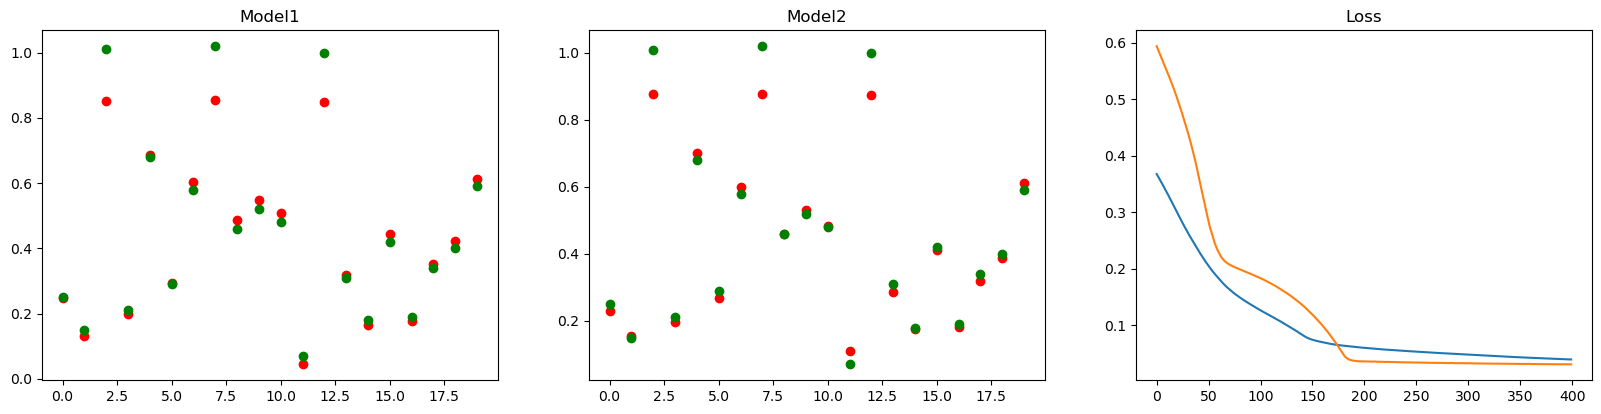

In [12]:
fig = plt.figure(figsize=(20,10))

fig.add_subplot(231)
plt.scatter(range(20), results1, c='r')
plt.scatter(range(20), y_test, c='g')
plt.title("Model1")

fig.add_subplot(232)
plt.scatter(range(20), results2, c='r')
plt.scatter(range(20), y_test, c='g')
plt.title("Model2")

fig.add_subplot(233)
plt.plot(history1.history['loss'])
plt.plot(history2.history['loss'])
plt.title("Loss")

plt.show()

### Variable Length Model

Here the model will be compiled once but used for a variable length input. This shows the flexibility of the LSTM architecture.

In [13]:
#Model 3
model3 = Sequential()
model3.add ( LSTM(1, batch_input_shape=(None, None,1), return_sequences=True))
model3.add ( LSTM(1, return_sequences=False))
model3.summary()
model3.compile (loss='mean_absolute_error', optimizer ='adam', metrics =['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, None, 1)           12        
                                                                 
 lstm_4 (LSTM)               (None, 1)                 12        
                                                                 
Total params: 24 (96.00 Byte)
Trainable params: 24 (96.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
#fit model on existing data
history3  = model3.fit( x_train, y_train, epochs=200, validation_data=(x_test, y_test), verbose=0)
results3 = model3.predict(x_test)

1/1 [==============================] - 0s 330ms/step


In [15]:
#change the size of the input and target series

data = [[[(i+j)/100] for i in range (6)] for j in range(100)]
target = [(i+6)/100 for i in range(100)]
data = np.array(data, dtype=float)
target = np.array(target, dtype=float)

print (data.shape)
print (target.shape)
x_train, x_test, y_train, y_test = train_test_split (data, target, test_size = 0.2, random_state=4)

(100, 6, 1)
(100,)


In [16]:
#fit model on new data without recompiling
history3  = model3.fit( x_train, y_train, epochs=200, validation_data=(x_test, y_test), verbose=0)
results4 = model3.predict(x_test)

1/1 [==============================] - 0s 319ms/step
